
... ***CURRENTLY UNDER DEVELOPMENT*** ...


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.stats import linregress
from datetime import datetime

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.rbf import RBF_Interpolation
from teslakit.mda import Normalize
from teslakit.statistical import runmean
from teslakit.tides import Calculate_MMSL

from teslakit.estela import Predictor

from teslakit.plotting.tides import Plot_Tide_SLR, Plot_Tide_RUNM, Plot_Tide_MMSL
from teslakit.util.time_operations import npdt64todatetime, fast_reindex_hourly, repair_times_hourly, add_max_storms_mask
   


In [3]:
# --------------------------------------
# N, S, E profiles
pN = 35 #29 (36,22)
pS = 13 #7  (13,1)
pE = 18 #17 (21,14)


In [4]:
hist_Q_wavesH_N = xr.open_dataset('/Users/albacid/Projects/TeslaKit_projects/sites/KWAJALEIN/HYCREWW/hist_Q_wavesH_N_' + str(pN) + '.nc')
hist_Q_wavesH_S = xr.open_dataset('/Users/albacid/Projects/TeslaKit_projects/sites/KWAJALEIN/HYCREWW/hist_Q_wavesH_S_' + str(pS) + '.nc')
hist_Q_wavesH_E = xr.open_dataset('/Users/albacid/Projects/TeslaKit_projects/sites/KWAJALEIN/HYCREWW/hist_Q_wavesH_E_' + str(pE) + '.nc')


In [5]:
hist_Q_storms_N = xr.open_dataset('/Users/albacid/Projects/TeslaKit_projects/sites/KWAJALEIN/HYCREWW/hist_Q_storms_N_' + str(pN) + '.nc')
hist_Q_storms_S = xr.open_dataset('/Users/albacid/Projects/TeslaKit_projects/sites/KWAJALEIN/HYCREWW/hist_Q_storms_S_' + str(pS) + '.nc')
hist_Q_storms_E = xr.open_dataset('/Users/albacid/Projects/TeslaKit_projects/sites/KWAJALEIN/HYCREWW/hist_Q_storms_E_' + str(pE) + '.nc')


In [6]:
print(hist_Q_wavesH_N)
print(hist_Q_storms_N)

sys.exit()

<xarray.Dataset>
Dimensions:  (Q: 157776, Qinv: 157776, time: 157776)
Coordinates:
  * time     (time) datetime64[ns] 1996-01-17 ... 2014-01-15T23:00:00
  * Q        (Q) float64 -0.9425 -0.3922 -0.1975 ... -2.693 -2.934 -2.879
  * Qinv     (Qinv) float64 0.3519 0.6647 0.8175 ... 0.02092 0.01205 0.01374
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    bslope   (time) float64 ...
    rslope   (time) float64 ...
    rwidth   (time) float64 ...
    Zb       (time) float64 ...
    cf       (time) float64 ...
    level    (time) float64 ...
    hs_lo2   (time) float64 ...
<xarray.Dataset>
Dimensions:  (Q: 157776, Qinv: 157776, time: 157776)
Coordinates:
  * time     (time) datetime64[ns] 1996-01-17 ... 2014-01-15T23:00:00
  * Q        (Q) float64 -1.848 -1.302 -1.083 -1.329 ... -3.068 -3.303 -3.281
  * Qinv     (Qinv) float64 0.09963 0.2214 0.2952 ... 0.008617 0.004499 0.004798
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...


SystemExit: 

### Plot

Text(0.5, 1.0, 'East profile. Overtopping (l/s/m)')

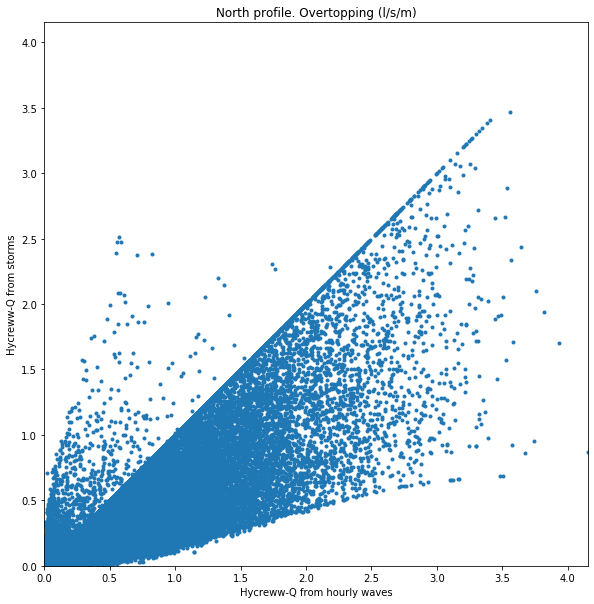

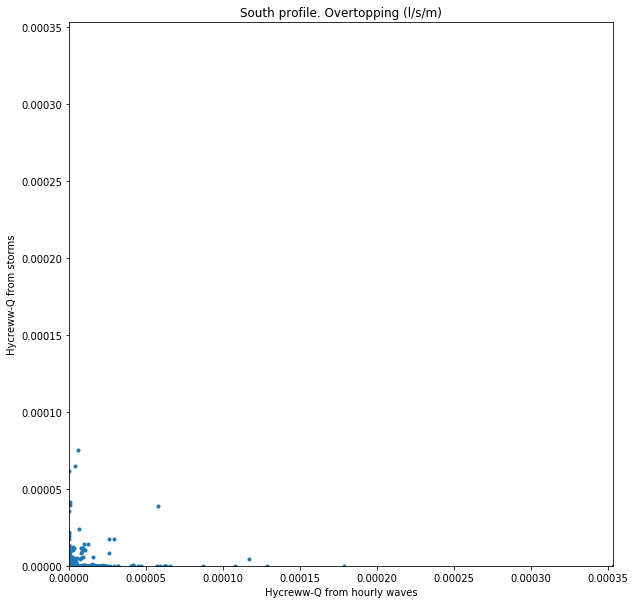

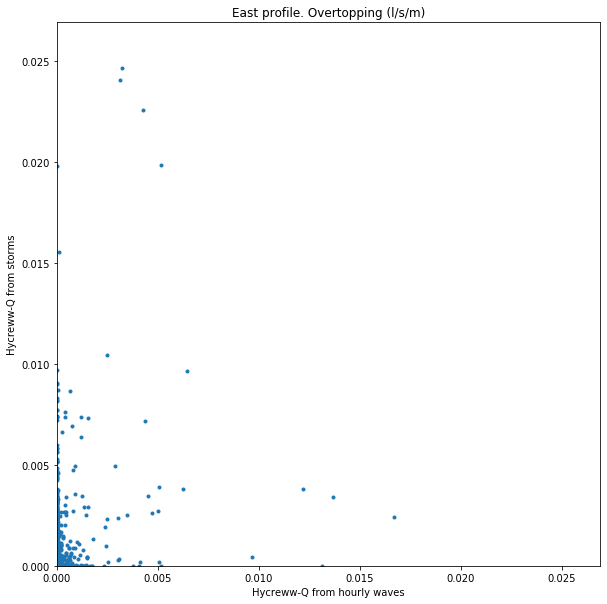

In [7]:
plt.figure(figsize=(20,10))
limits = np.max([np.nanmax(hist_Q_wavesH_N.Qinv.values), np.nanmax(hist_Q_storms_N.Qinv.values)])
plt.plot(hist_Q_wavesH_N.Qinv.values, hist_Q_storms_N.Qinv.values, '.')
plt.xlim(0, limits)
plt.ylim(0, limits)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Hycreww-Q from hourly waves')
plt.ylabel('Hycreww-Q from storms')
plt.title('North profile. Overtopping (l/s/m)')


plt.figure(figsize=(20,10))
limits = np.max([np.nanmax(hist_Q_wavesH_S.Qinv.values), np.nanmax(hist_Q_storms_S.Qinv.values)])
plt.plot(hist_Q_wavesH_S.Qinv.values, hist_Q_storms_S.Qinv.values, '.')
plt.xlim(0, limits)
plt.ylim(0, limits)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Hycreww-Q from hourly waves')
plt.ylabel('Hycreww-Q from storms')
plt.title('South profile. Overtopping (l/s/m)')

plt.figure(figsize=(20,10))
limits = np.max([np.nanmax(hist_Q_wavesH_E.Qinv.values), np.nanmax(hist_Q_storms_E.Qinv.values)])
plt.plot(hist_Q_wavesH_E.Qinv.values, hist_Q_storms_E.Qinv.values, '.')
plt.xlim(0, limits)
plt.ylim(0, limits)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Hycreww-Q from hourly waves')
plt.ylabel('Hycreww-Q from storms')
plt.title('East profile. Overtopping (l/s/m)')